In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## Numerical Solution of Coupled Differential Equation

In [2]:
k = 1
m = 1

def f_3osc(t,y):
    r = y[0:3]
    v = y[3:6]
    eq1 = (2*r[0] - r[1]) * -k/m
    eq2 = (-r[0] + 2*r[1] - r[2]) * -k/m
    eq3 = (-r[1] + 2*r[2]) * -k/m
    
    return [v[0], v[1], v[2], eq1, eq2, eq3]

In [3]:
tStart = 0
tEnd = 100

a = 1

yStart = 0.3 * (2*np.random.rand(6) - 1) * a
solution_3osc = integrate.solve_ivp(f_3osc, [tStart, tEnd], yStart, method = 'RK45', t_eval = np.linspace(tStart, tEnd, 1001))

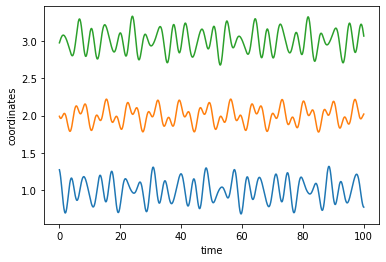

In [4]:
plt.xlabel('time')
plt.ylabel('coordinates')

plt.plot(solution_3osc.t, solution_3osc.y[0] + 1*a)
plt.plot(solution_3osc.t, solution_3osc.y[1] + 2*a)
plt.plot(solution_3osc.t, solution_3osc.y[2] + 3*a)

## The Eigenvalue Problem

### Calculating the Eigenvalue of the matrix

In [5]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

In [6]:
np.linalg.eigvals(A)

array([3.41421356, 2.        , 0.58578644])

### Analyzing the Eigensystem

In [7]:
np.linalg.eig(A)

(array([3.41421356, 2.        , 0.58578644]),
 array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  4.05405432e-16,  7.07106781e-01],
        [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

## Fourier Transform

In [8]:
def IntegralTrapezoidal(data):
    a = 0
    for i in range(len(data[0])-1):
        a = a + (data[1,i+1] + data[1,i]) / 2 * (data[0,i+1] - data[0,i])
    return a

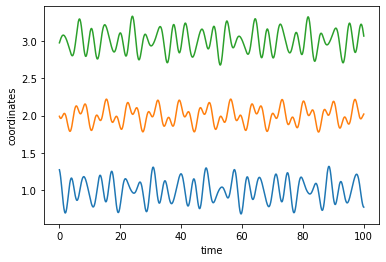

In [9]:
plt.xlabel('time')
plt.ylabel('coordinates')

plt.plot(solution_3osc.t, solution_3osc.y[0] + 1*a)
plt.plot(solution_3osc.t, solution_3osc.y[1] + 2*a)
plt.plot(solution_3osc.t, solution_3osc.y[2] + 3*a)

In [10]:
ft = np.array(
    [[[om,
      IntegralTrapezoidal(np.array([solution_3osc.t, 1/np.sqrt(2*np.pi) * solution_3osc.y[i] * np.exp(1j*om*solution_3osc.t)]) )] for om in np.linspace(0,3,301)]
    for i in range(3)]
)

In [11]:
ft.shape

(3, 301, 2)

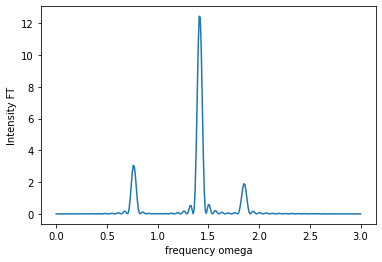

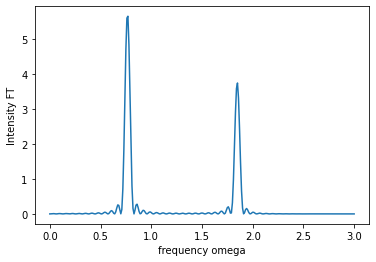

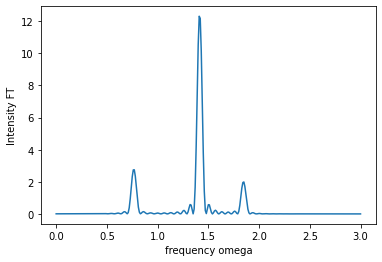

In [12]:
plt.xlabel('frequency omega')
plt.ylabel('Intensity FT')

plt.plot(ft[0,:,0].real, abs(ft[0,:,1])**2)
plt.show()

plt.xlabel('frequency omega')
plt.ylabel('Intensity FT')

plt.plot(ft[1,:,0].real, abs(ft[1,:,1])**2)
plt.show()

plt.xlabel('frequency omega')
plt.ylabel('Intensity FT')

plt.plot(ft[2,:,0].real, abs(ft[2,:,1])**2)
plt.show()

In [13]:
omega1 = np.sqrt(k/m) * np.sqrt(2 + np.sqrt(2))
omega2 = np.sqrt(k/m) * np.sqrt(2)
omega3 = np.sqrt(k/m) * np.sqrt(2 - np.sqrt(2))
print(omega1)
print(omega2)
print(omega3)

1.8477590650225735
1.4142135623730951
0.7653668647301795


## Generalization to n Oscillators

In [14]:
n = 20
def f_nosc(t,y):
    r = y[0:n]
    v = y[n:2*n]
    eq = np.zeros(n)
    eq[0] = 2*r[0] -r[1]
    eq[1:-1] = -r[:-2] + 2*r[1:-1] -r[2:]
    eq[n-1] = -r[n-2] + 2*r[n-1]
    return np.concatenate([v, -k/m*eq])

In [15]:
a = 1
yStart = 0.3 * (2*np.random.rand(2*n)-1) * a

solution_nosc = integrate.solve_ivp(f_nosc, [tStart, tEnd], yStart, method='RK45', t_eval=np.linspace(tStart,tEnd,501))

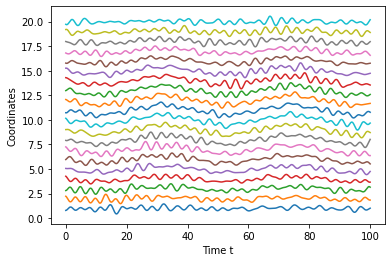

In [16]:
plt.xlabel('Time t')
plt.ylabel('Coordinates')

for i in range(n):
    plt.plot(solution_nosc.t, solution_nosc.y[i] + (i+1)*a)

In [17]:
A = np.diag([-1]*(n-1), k = 1) + np.diag([2]*(n), k = 0) + np.diag([-1]*(n-1), k = -1)

In [18]:
np.sqrt(k/m) * np.sqrt( np.linalg.eigvals(A) )

array([1.99440759, 1.97766165, 1.94985582, 1.91114561, 1.8617475 ,
       1.80193774, 1.73205081, 1.65247755, 1.56366296, 1.46610374,
       1.36034548, 1.2469796 , 1.12664012, 0.14946019, 0.29808453,
       0.44504187, 0.58951035, 0.73068205, 0.86776748, 1.        ])

In [21]:
ft = np.array(
    [[[om, 
    IntegralTrapezoidal( np.array([solution_nosc.t, 1/np.sqrt(2*np.pi) * solution_nosc.y[i] * np.exp(1j*om*solution_nosc.t)]) )] for om in np.linspace(0,2.5,251)] 
    for i in range(n)]
)

In [22]:
ft.shape

(20, 251, 2)

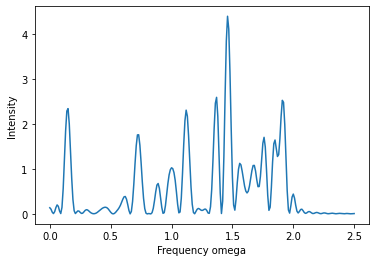

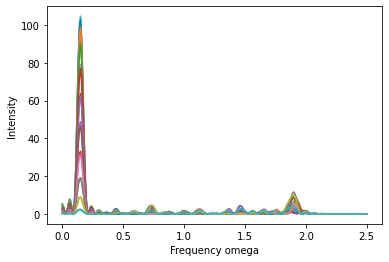

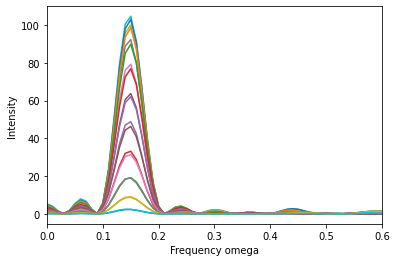

In [23]:
plt.xlabel('Frequency omega')
plt.ylabel('Intensity')
plt.plot(ft[0,:,0].real, abs(ft[0,:,1])**2 ) 
plt.show()

plt.xlabel('Frequency omega')
plt.ylabel('Intensity')
for i in range(n):
    plt.plot(ft[i,:,0].real, abs(ft[i,:,1])**2 ) 
plt.show()

plt.xlabel('Frequency omega')
plt.ylabel('Intensity')
plt.xlim([0,0.6])
for i in range(n):
    plt.plot(ft[i,:,0].real, abs(ft[i,:,1])**2 ) 
plt.show()